#HW #1. Improve code Efficiency: Sort First!

## Scenario.

In a two class, classification problem, it is common to use a classifier that outputs confidences (rather than simply class labels). A good example of this is a Support Vector Machine. A pro for using such a classifier is that you gain more information -- specifically the confidence in the classification result. A con is that in order to make a final classification decision, a threshold value must be determined. For example, if a threshold of 0.75 is chosen, the class label 1 would be assigned for confidences greater than 0.75 and for confidences less than 0.75 a class label of 0 would be assigned. However, this begs the question: how is the threshold chosen?

Many data scientists will choose a threshold based on the experimental results and/or operational constraints. In this code example, we assume that we have confidences and true labels for a large data set. To determine a good threshold we will compute the true positive rates (TPRs) and false positive rates (FPRs) at all relevant thresholds. The relevant thresholds are considered those that would change the TPRs and FPRs.

In the code below, a function is defined to compute the TPR and FPR at all relevant thresholds. However, the code is not very efficient and can be improved. (Note there are tips and hints found in the comments.)

Your task is the following:

## Question 1
**40 POINTS**  
Assess the time complexity of the method computeAllTPRs(...). Provide a line-by-line assessment in comments identifying the proportional number of steps (bounding notation is sufficient) per line: eg, O(1), O(log n), O(n), etc. Also, derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 2
**30 POINTS**  
Implement a new function computeAllTPRs_improved(...) which performs the same task as computeAllTPRs but has a significantly reduced time complexity. Also provide a line-by-line assessment in comments identifying the proportional number of steps per line, and derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 3
**30 POINTS**  
Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).  

**NOTE: Do not include runtimes for graphing**

**TOTAL POINTS: 100**

---

In [1]:
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from numpy import argmax

Answer Question #1 in the comments of the code chunk below.

In [4]:
def computeAllTPRs(true_label, confs):
        '''

        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables
        sentinelValue = -1 # O(1) # used to replace max value found thus far 
        totalPositives = sum(true_label) # O(1)
        totalNegatives = len(true_label) - totalPositives # O(1)
        truePositives = 0 # O(1)
        falsePositives = 0 # O(1)
        # Hint: Consider Memory Management
        truePositiveRate = [] # O(1)
        falsePositiveRate = [] # O(1)

        #Hint: Although not explicitly clear, the loop structure below is an
            #embeded loop ie, O(n^2) ... do you see why??
        #Hint: If you sort the confidences first you can improve the iteration scheme.

        # Iterate over all relevant thresholds. Compute TPR and FPR for each and
        # append to truePositiveRate , falsePositiveRate lists.

        # there is an outer loop over all thresholds hence O(n) for all computations
        for i in range(len(confs)): # O(n)
          maxVal = max(confs)  # O(n)
          argMax = argmax(confs) # O(n)
          confs[argMax] = sentinelValue # O(1)
          if true_label[argMax]==1: # O(1)
            truePositives += 1 # O(1)
          else:
            falsePositives += 1 # O(1)

          truePositiveRate.append(truePositives/totalPositives) # O(1)
          falsePositiveRate.append(falsePositives/totalNegatives) # O(1)


In [6]:
def testComputeAllTPRs(numSamples):

  confList = []
  labels = []
  maxVal = 10000
  for i in range(0,numSamples):
    n = random.randint(1,maxVal)
    confList.append(n/maxVal)
    if n/maxVal > .5:
      lab = 1
    else:
      lab = 0
    labels.append(lab)
  computeAllTPRs(labels, deepcopy(confList))  # Why a deepcopy here?

### Time Step Function $T(n)$ 

- before the loop O(n)
- inside the loop each iteration calls for max() and argmax() which are both O(n) so the overall time complexity for the loop is O(n^2)

the T(n) = O(n^2)

Below, provide your implementation for Question #2.

In [8]:
def computeAllTPRs(true_label, confs):
        '''

        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables
        sentinelValue = -1 # O(1) # used to replace max value found thus far 
        totalPositives = sum(true_label) # O(n)
        totalNegatives = len(true_label) - totalPositives # O(1)
        truePositives = 0 # O(1)
        falsePositives = 0 # O(1)
        # Hint: Consider Memory Management
        truePositiveRate = [] # O(1)
        falsePositiveRate = [] # O(1)

        sorted_paired_data = sorted(zip(confs, true_label), reverse=True) # O(nlogn) 
        
        for conf, label in sorted_paired_data: # O(n)
          if label == 1:
            truePositives += 1 # O(1)
          else:  
            falsePositives += 1 # O(1)

          truePositiveRate.append(truePositives/totalPositives) # O(1)
          falsePositiveRate.append(falsePositives/totalNegatives) # O(1)

        return truePositiveRate, falsePositiveRate


Question #3. Below, provide your code which records and plots the runtime for the original and improved methods.

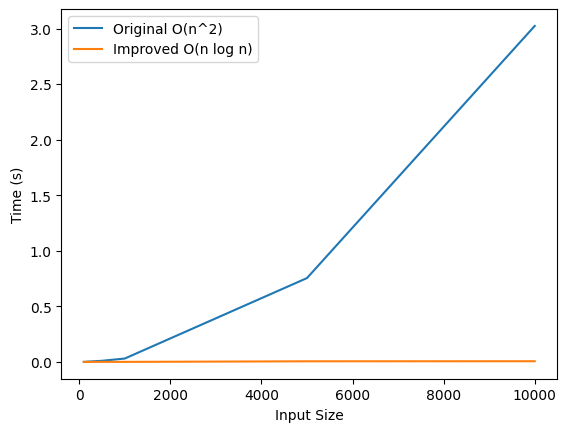

In [4]:
import time
import random
import matplotlib.pyplot as plt

# Original function
def computeAllTPRs(true_label, confs):
    sentinelValue = -1
    totalPositives = sum(true_label)
    totalNegatives = len(true_label) - totalPositives
    truePositives = 0
    falsePositives = 0
    truePositiveRate = []
    falsePositiveRate = []

    for i in range(len(confs)):
        maxVal = max(confs)
        argMax = confs.index(maxVal)
        confs[argMax] = sentinelValue
        if true_label[argMax] == 1:
            truePositives += 1
        else:
            falsePositives += 1

        truePositiveRate.append(truePositives / totalPositives)
        falsePositiveRate.append(falsePositives / totalNegatives)

    return truePositiveRate, falsePositiveRate

# Improved function 
def computeAllTPRs_improved(true_label, confs):
    totalPositives = sum(true_label)
    totalNegatives = len(true_label) - totalPositives
    truePositives = 0
    falsePositives = 0
    truePositiveRate = []
    falsePositiveRate = []

    sorted_paired_data = sorted(zip(confs, true_label), reverse=True)

    for conf, label in sorted_paired_data:
        if label == 1:
            truePositives += 1
        else:
            falsePositives += 1

        truePositiveRate.append(truePositives / totalPositives)
        falsePositiveRate.append(falsePositives / totalNegatives)

    return truePositiveRate, falsePositiveRate

# Testing runtime for various input sizes
def test_runtime():
    sizes = [100, 500, 1000, 5000, 10000]
    original_times = []
    improved_times = []

    for size in sizes:
        confList = [random.random() for _ in range(size)]
        labels = [1 if c > 0.5 else 0 for c in confList]

        # Time original function
        start = time.time()
        computeAllTPRs(labels, confList.copy())
        end = time.time()
        original_times.append(end - start)

        # Time improved function
        start = time.time()
        computeAllTPRs_improved(labels, confList.copy())
        end = time.time()
        improved_times.append(end - start)

    # Plotting the runtime comparison
    plt.plot(sizes, original_times, label="Original O(n^2)")
    plt.plot(sizes, improved_times, label="Improved O(n log n)")
    plt.xlabel('Input Size')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.show()

# Run the runtime comparison
test_runtime()